# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Copyright statement: 
#### <span style='font-family:"Times New Roman"'>I have modified the provided code by `https://github.com/TomaszGolan/introduction_to_machine_learning/` in this project. 

# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
## <span style='font-family:"Times New Roman"'>This code, performs grid wise classification using K-Nearest Neighbors to classify Double Moon and XOR datasets.   

In [1]:
import matplotlib.pyplot as plt
import numpy as np
mpl_colors = ('b', 'r')
plt.style.use('default')
plt.style.use('ggplot')

In [2]:
class NearestNeighbor():
  """Nearest Neighbor Classifier"""

  def __init__(self, distance=0):
    if distance == 0:
      self.distance = np.abs     # absolute value
    elif distance == 1:
      self.distance = np.square  # square root
    else:
      raise Exception("Distance not defined.")


  def train(self, x, y):

    self.x_train = x
    self.y_train = y


  def predict(self, x):

    predictions = []  
    for x_test in x:
      distances = np.sum(self.distance(self.x_train - x_test), axis=1)

      min_index = np.argmin(distances)

      predictions.append(self.y_train[min_index])

    return predictions

In [3]:
class Analysis():

  def __init__(self, *x, distance):

    self.nof_classes = len(x)


    y = [i * np.ones(_x.shape[0], dtype=np.int) for i, _x in enumerate(x)]
    y = np.array(y).ravel()

    self.x_train = x

    x = np.concatenate(x, axis=0)

    self.nn = NearestNeighbor(distance)
    self.nn.train(x, y)


  def prepare_test_samples(self, low=-10, high=10, step=0.1):
 
    self.range = [low, high]

    grid = np.mgrid[low:high+step:step, low:high+step:step]

    self.x_test = np.vstack([grid[0].ravel(), grid[1].ravel()]).T


  def analyse(self):
    

    self.y_test = self.nn.predict(self.x_test)

    self.classified = [] 

    for label in range(self.nof_classes):
   
      class_i = np.array([self.x_test[i] \
                          for i, l in enumerate(self.y_test) \
                          if l == label])
      self.classified.append(class_i)


  def plot(self, t=''):
    """Visualize the result of classification"""
    plot = init_plot(self.range, self.range)
    plot.set_title(t)
    plot.grid(False)




    for i, x in enumerate(self.classified):
      plot.plot(*x.T, mpl_colors[i] + ',')

In [4]:
class kNearestNeighbors(NearestNeighbor):


  def __init__(self, k=1, distance=0):
  
    super().__init__(distance)
    self.k = k


  def predict(self, x):

    predictions = []  
    nof_classes = np.amax(self.y_train) + 1

   
    for x_test in x:
   
      distances = np.sum(self.distance(self.x_train - x_test), axis=1)

    
      votes = np.zeros(nof_classes, dtype=np.int)

    
      for neighbor_id in np.argsort(distances)[:self.k]:
        neighbor_label = self.y_train[neighbor_id]
        votes[neighbor_label] += 1

      predictions.append(np.argmax(votes))

    return predictions

class kAnalysis(Analysis):

 def __init__(self, *x, k=1, distance=1):

    self.nof_classes = len(x)

    y = [i * np.ones(_x.shape[0], dtype=np.int) for i, _x in enumerate(x)]
    y = np.array(y).ravel()

    self.x_train = x

    x = np.concatenate(x, axis=0)

    self.nn = kNearestNeighbors(k, distance)
    self.nn.train(x, y)

In [5]:
def init_plot(x_range=None, y_range=None, x_label="$x_1$", y_label="$x_2$"):
  """Set axes limits and labels

  x_range -- [min x, max x]
  y_range -- [min y, max y]
  x_label -- string
  y_label -- string
  """

  _, ax = plt.subplots(figsize=(10, 10),dpi=70)


  ax.grid(c='0.70', linestyle=':')


  ax.set_xlim(x_range) 
  ax.set_ylim(y_range)


  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)

  return ax

In [6]:
X1 = np.load("1XOR.npy")
X1 = X1[1:250, :]

X2 = np.load("-1XOR.npy")
X2 = X2[1:250, :]

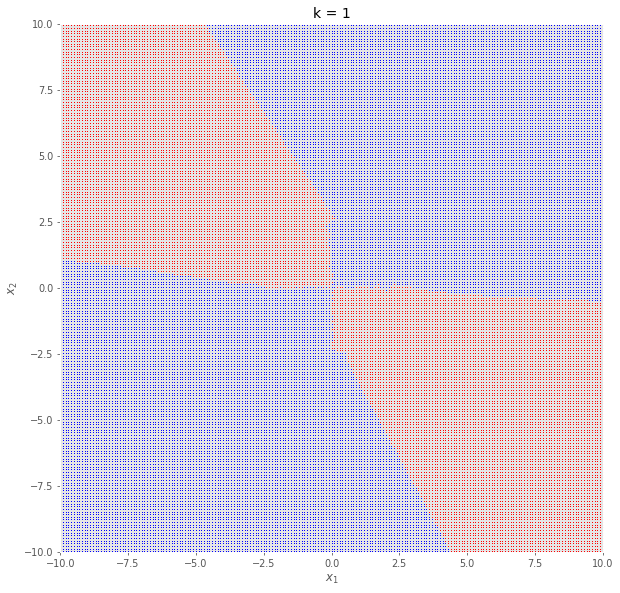

In [7]:
knn = kAnalysis(X1, X2, k = 1, distance = 1)
knn.prepare_test_samples()
knn.analyse()
knn.plot("k = 1")
plt.show()

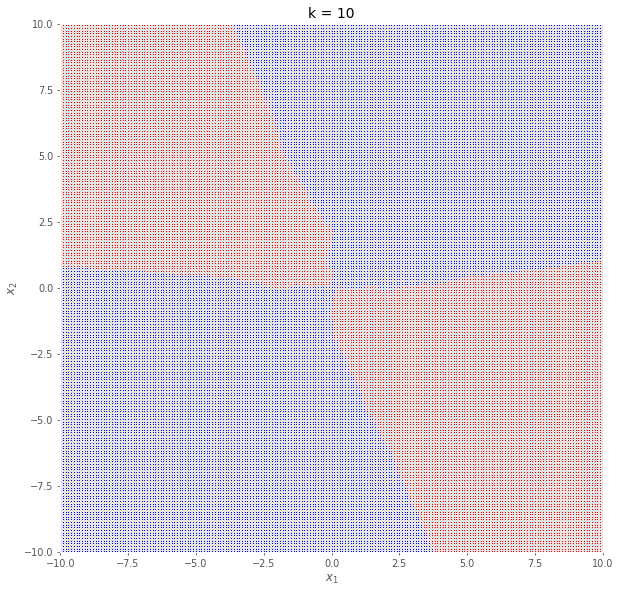

In [8]:
knn = kAnalysis(X1, X2, k = 10, distance = 1)
knn.prepare_test_samples()
knn.analyse()
knn.plot("k = 10")
plt.show()

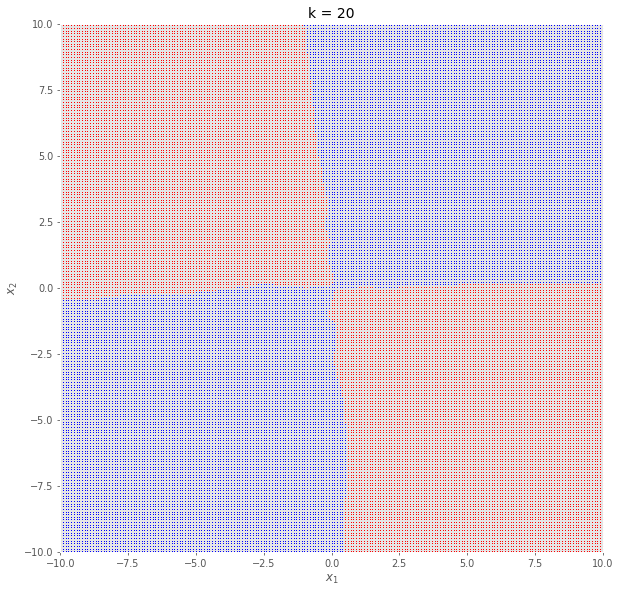

In [9]:
knn = kAnalysis(X1, X2, k = 20, distance = 1)
knn.prepare_test_samples()
knn.analyse()
knn.plot("k = 20")
plt.show()

In [10]:
X1 = np.load("1moon.npy")
X1 = X1[1:250, :]

X2 = np.load("-1moon.npy")
X2 = X2[1:250, :]

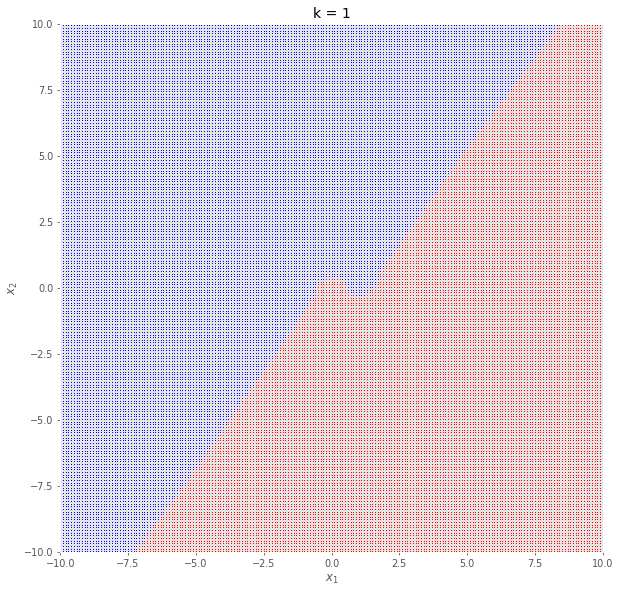

In [11]:
knn = kAnalysis(X1, X2, k = 1, distance = 1)
knn.prepare_test_samples()
knn.analyse()
knn.plot("k = 1")
plt.show()

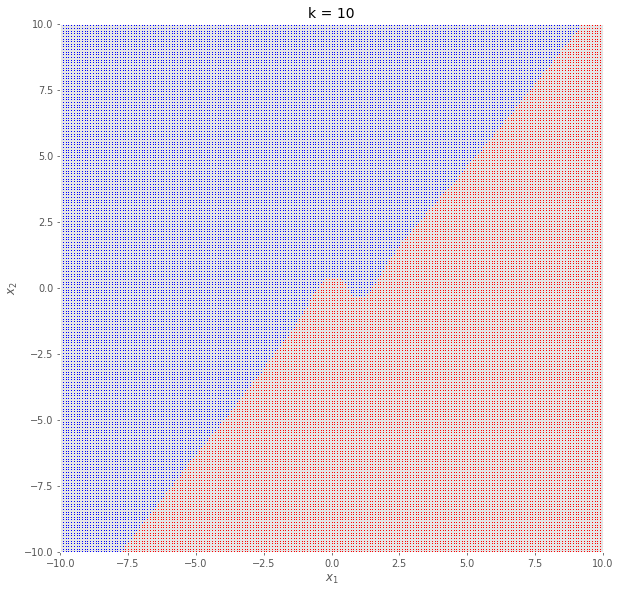

In [12]:
knn = kAnalysis(X1, X2, k = 10, distance = 1)
knn.prepare_test_samples()
knn.analyse()
knn.plot("k = 10")
plt.show()

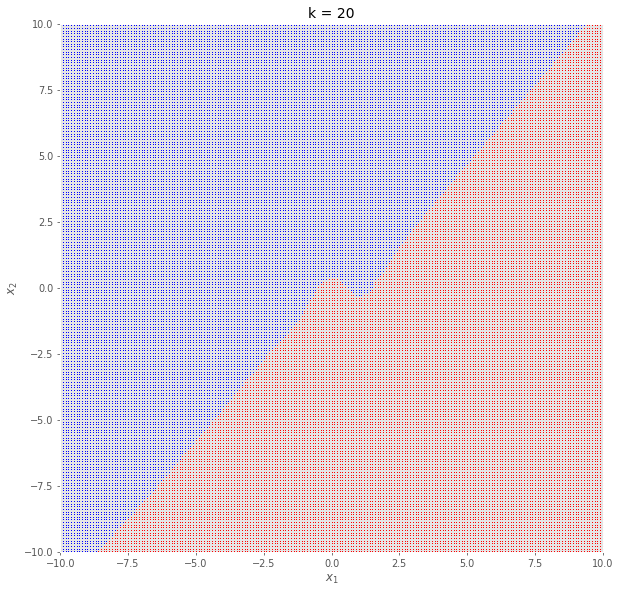

In [13]:
knn = kAnalysis(X1, X2, k = 20, distance = 1)
knn.prepare_test_samples()
knn.analyse()
knn.plot("k = 20")
plt.show()